# Haiku Detector

In [1]:
import nltk
from nltk.corpus import cmudict

nltk.download('punkt')
nltk.download('cmudict')

pron_dict = cmudict.dict()

def count_syllables(word):
    # fallback to approximation if word not in dict
    if word.lower() not in pron_dict:
        return syllable_count_fallback(word)
    else:
        return [len(list(y for y in x if y[-1].isdigit())) for x in pron_dict[word.lower()]][0]

def syllable_count_fallback(word):
    count = 0
    vowels = "aeiouy"
    word = word.lower()
    if word[0] in vowels:
        count += 1
    for index in range(1, len(word)):
        if word[index] in vowels and word[index - 1] not in vowels:
            count += 1
    if word.endswith("e"):
        count -= 1
    if word.endswith("le"):
        count += 1
    if count == 0:
        count += 1
    return count

def is_haiku(text):
    lines = text.split('\n')
    if len(lines) != 3:
        return False

    for i, line in enumerate(lines):
        words = nltk.word_tokenize(line)
        syllables = 0
        for word in words:
            if word.isalpha():
                syllables += count_syllables(word)
        if i % 2 == 0 and syllables != 5:
            return False
        elif i == 1 and syllables != 7:
            return False
    return True


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package cmudict to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


In [78]:
# load json from machine_data_stories folder

import json
with open('../machine_data_stories/GPT4_temp0.6_haiku_nocrea110.json', 'r') as f:
    data_06 = json.load(f)
    data_06 = list(data_06.values())

with open('../machine_data_stories/GPT4_temp0.8_haiku_nocrea110.json', 'r') as f:
    data_08 = json.load(f)
    data_08 = list(data_08.values())

with open('../machine_data_stories/GPT4_temp1.0_haiku_nocrea100.json', 'r') as f:
    data_10 = json.load(f)
    data_10 = list(data_10.values())
    
with open('../machine_data_stories/GPT4_temp1.2_haiku_nocrea130.json', 'r') as f:
    data_12 = json.load(f)
    data_12 = list(data_12.values())

with open('../machine_data_stories/GPT4_temp1.4_haiku_nocrea110.json', 'r') as f:
    data_14 = json.load(f)
    data_14 = list(data_14.values())
    
GPT4_haikus = {'0.6': data_06, '0.8': data_08, '1.0': data_10, '1.2': data_12, '1.4': data_14}

GPT4_haikus_proportion = {}
for key, value in GPT4_haikus.items():
    # check if haiku in all haiku_list are haiku
    haiku_count = 0
    for haiku in value:
        if is_haiku(haiku):
            haiku_count += 1
    # calculate proportion of haiku in haiku_list
    haiku_proportion = haiku_count / len(haiku_list)
    haiku_proportion
    
    GPT4_haikus_proportion[key] = haiku_proportion

Text(0.5, 0, 'Temperature')

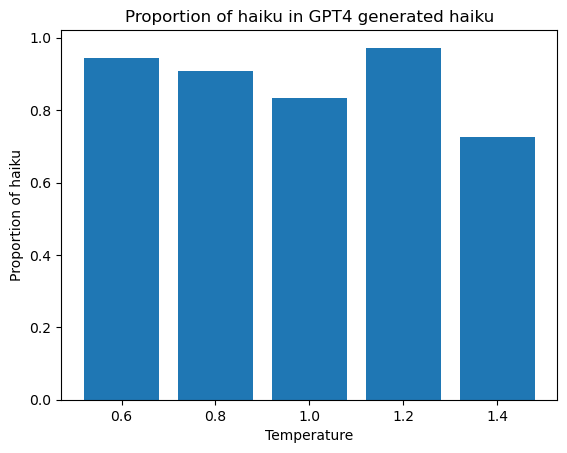

In [83]:
#plot haiku proportion
import matplotlib.pyplot as plt

plt.bar(range(len(GPT4_haikus_proportion)), list(GPT4_haikus_proportion.values()), align='center')

# add labels
plt.xticks(range(len(GPT4_haikus_proportion)), list(GPT4_haikus_proportion.keys()))

#add title
plt.title('Proportion of haiku in GPT4 generated haiku')

#add y label
plt.ylabel('Proportion of haiku')

#add x label
plt.xlabel('Temperature')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package cmudict to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package cmudict is already up-to-date!
